# Analyse  Src

 work with Weakly_2024_07
- use jupyter kernel LSST


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2024/02/25
- update : 2024/02/29


``Quantum Graphs``: https://tigress-web.princeton.edu/~lkelvin/pipelines/ 

``CalibrateTask``: 
https://github.com/lsst/pipe_tasks/blob/main/python/lsst/pipe/tasks/calibrate.py#L392-L399

 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm,SymLogNorm


import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from astropy.visualization import (MinMaxInterval, SqrtStretch,ZScaleInterval,PercentileInterval,
                                   ImageNormalize,imshow_norm)
from astropy.visualization.stretch import SinhStretch, LinearStretch,AsinhStretch,LogStretch
from astropy.io import fits
import astropy.coordinates as coord
import astropy.units as u
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (4,3)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [2]:
#df_sel["psfMag"] =  df_sel['psfFlux'].map(convert_fluxtomag)
#df_sel["gaussianMag"] =  df_sel['gaussianFlux'].map(lambda x:-2.50 * np.log10(x) + 31.4)
#df_sel["gaussianMag"] =  df_sel['gaussianFlux'].map(convert_fluxtomag)

def convert_fluxtomag(x) :
    """
    The object and source catalogs store only fluxes. There are hundreds of flux-related columns, 
    and to store them also as magnitudes would be redundant, and a waste of space.
    All flux units are nanojanskys. The AB Magnitudes Wikipedia page provides a concise resource 
    for users unfamiliar with AB magnitudes and jansky fluxes. To convert to AB magnitudes use:
    As demonstrated in Section 2.3.2, to add columns of magnitudes after retrieving columns of flux, users can do this:
    results_table['r_calibMag'] = -2.50 * numpy.log10(results_table['r_calibFlux']) + 31.4
    results_table['r_cModelMag'] = -2.50 * numpy.log10(results_table['r_cModelFlux']) + 31.4
    (from DP0 tutorial)
    """
    return -2.50 * np.log10(x) + 31.4

## Configuration

In [3]:
#filesource_in="preSourceTable_202312.csv"
filesource_in1="../data/202402/icSrc_202402.csv"
filesource_in2="../data/202402/src_202402.csv"
filevisit_in3 = "../data/202402/ccdVisitTable_202402.csv"
fileisolated_star_sources_in4 = "../data/202402/isolated_star_sources_202402.csv"

## Read files

In addition compute nightobs and seq

In [4]:
#icSrc
df1 = pd.read_csv(filesource_in1,index_col=0)
df1.dropna(axis=1, how='all',inplace =True)
df1["nightObs"] =df1.apply(lambda x: x['visitId']//100_000, axis=1)
df1["seq"] = df1["visitId"] - df1["nightObs"]*100_000
df1["slot_ApFlux_instMag"] =  df1["slot_ApFlux_instFlux"].map(convert_fluxtomag)
df1["slot_PsfFlux_instMag"] =  df1["slot_PsfFlux_instFlux"].map(convert_fluxtomag)

#df1["base_ApFlux_instMag"] =  df1["base_ApFlux_instFlux"].map(convert_fluxtomag)
df1["base_PsfFlux_instMag"] =  df1["base_PsfFlux_instFlux"].map(convert_fluxtomag)

/tmp/ipykernel_38685/3553443200.py:16: RuntimeWarning: invalid value encountered in log10
  return -2.50 * np.log10(x) + 31.4
/tmp/ipykernel_38685/3553443200.py:16: RuntimeWarning: invalid value encountered in log10
  return -2.50 * np.log10(x) + 31.4
/tmp/ipykernel_38685/3553443200.py:16: RuntimeWarning: invalid value encountered in log10
  return -2.50 * np.log10(x) + 31.4


In [5]:
list(df1.columns)

['id',
 'parent',
 'calib_psf_candidate',
 'calib_psf_used',
 'calib_psf_reserved',
 'base_SdssCentroid_x',
 'slot_Centroid_x',
 'base_SdssCentroid_y',
 'slot_Centroid_y',
 'base_SdssCentroid_xErr',
 'slot_Centroid_xErr',
 'base_SdssCentroid_yErr',
 'slot_Centroid_yErr',
 'base_SdssCentroid_flag',
 'base_CircularApertureFlux_flag_badCentroid',
 'base_GaussianFlux_flag_badCentroid',
 'base_PsfFlux_flag_badCentroid',
 'ext_shapeHSM_HsmSourceMoments_flag_badCentroid',
 'slot_Centroid_flag',
 'base_SdssCentroid_flag_edge',
 'base_CircularApertureFlux_flag_badCentroid_edge',
 'base_GaussianFlux_flag_badCentroid_edge',
 'base_PsfFlux_flag_badCentroid_edge',
 'ext_shapeHSM_HsmSourceMoments_flag_badCentroid_edge',
 'slot_Centroid_flag_edge',
 'base_SdssCentroid_flag_noSecondDerivative',
 'base_CircularApertureFlux_flag_badCentroid_noSecondDerivative',
 'base_GaussianFlux_flag_badCentroid_noSecondDerivative',
 'base_PsfFlux_flag_badCentroid_noSecondDerivative',
 'ext_shapeHSM_HsmSourceMoments_f

In [6]:
#src
df2 = pd.read_csv(filesource_in2,index_col=0)
df2.dropna(axis=1, how='all',inplace =True)
df2["nightObs"] =df2.apply(lambda x: x['visitId']//100_000, axis=1)
df2["seq"] = df2["visitId"] - df2["nightObs"]*100_000

In [7]:
#ccd visits
df3 = pd.read_csv(filevisit_in3,index_col=0)
df3.dropna(axis=1, how='all',inplace =True)
df3["nightObs"] =df3.apply(lambda x: x['visitId']//100_000, axis=1)
df3["seq"] = df3["visitId"] - df3["nightObs"]*100_000

In [8]:
# isolated sources
df4 = pd.read_csv(fileisolated_star_sources_in4,index_col=0)
df4.dropna(axis=1, how='all',inplace =True)
df4 = df4.rename(columns={"visit": "visitId"})
df4["nightObs"] =df4.apply(lambda x: x['visitId']//100_000, axis=1)
df4["seq"] = df4["visitId"] - df4["nightObs"]*100_000

In [9]:
col_df1 = df1.columns.tolist()
col_df2 = df2.columns.tolist()
col_df3 = df3.columns.tolist()
col_df4 = df4.columns.tolist()

## Dump tables

In [10]:
#icSrc
df1.sort_values(by=["visitId","id"], inplace=True) 
df1

,id,parent,calib_psf_candidate,calib_psf_used,calib_psf_reserved,base_SdssCentroid_x,slot_Centroid_x,base_SdssCentroid_y,slot_Centroid_y,base_SdssCentroid_xErr,...,slot_PsfFlux_flag_apCorr,base_ClassificationExtendedness_value,base_ClassificationExtendedness_flag,base_FootprintArea_value,visitId,nightObs,seq,slot_ApFlux_instMag,slot_PsfFlux_instMag,base_PsfFlux_instMag
0,171629648369680385,0,False,False,False,607.000000,607.000000,65.000000,65.000000,NaN,...,False,NaN,True,11417,2023051100262,20230511,262,22.650724,24.304805,24.304805
1,171629648369680386,0,False,False,False,2176.249515,2176.249515,166.836178,166.836178,0.020091,...,False,0.0,False,23671,2023051100262,20230511,262,17.040514,17.047129,17.047129
2,171629648369680387,0,False,False,False,1575.556310,1575.556310,81.251092,81.251092,0.071626,...,False,0.0,False,10095,2023051100262,20230511,262,19.384072,19.376293,19.376293
3,171629648369680388,0,False,False,False,3939.215109,3939.215109,191.296848,191.296848,0.031476,...,False,0.0,False,13668,2023051100262,20230511,262,18.141559,18.250550,18.250550
4,171629648369680389,0,False,False,False,891.736477,891.736477,252.291108,252.291108,0.079325,...,False,0.0,False,9784,2023051100262,20230511,262,19.299290,19.278737,19.278737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,180918223816884313,0,False,False,False,2915.028508,2915.028508,3796.010222,3796.010222,NaN,...,False,NaN,True,7181,2024013000170,20240130,170,NaN,NaN,NaN
89,180918223816884314,0,False,False,False,2218.597456,2218.597456,3734.494485,3734.494485,0.029105,...,False,0.0,False,30827,2024013000170,20240130,170,18.044648,18.045355,18.045355
90,180918223816884315,0,False,False,False,1385.000000,1385.000000,3894.000000,3894.000000,0.007207,...,False,NaN,True,61324,2024013000170,20240130,170,15.159987,15.163609,15.163609
91,180918223816884316,0,False,False,False,2959.788725,2959.788725,3891.791217,3891.791217,NaN,...,False,NaN,True,4475,2024013000170,20240130,170,NaN,NaN,NaN


In [11]:
np.sort(df1["nightObs"].unique())

array([20230511, 20230523, 20230524, 20230704, 20230705, 20230706,
       20230718, 20230720, 20230801, 20230802, 20230803, 20230815,
       20230816, 20230817, 20230829, 20230914, 20230927, 20230928,
       20231010, 20231011, 20231107, 20231108, 20231113, 20231114,
       20231115, 20231116, 20231120, 20231121, 20231127, 20231128,
       20231129, 20231130, 20231204, 20231205, 20231206, 20231211,
       20231212, 20231214, 20231215, 20231219, 20231220, 20231221,
       20231222, 20240129, 20240130])

/tmp/ipykernel_38685/3160797363.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  axes = df1.hist(column= column_names,histtype='bar',bins=50,ax=ax,xrot=0,range=(-1000,110000),legend=True)


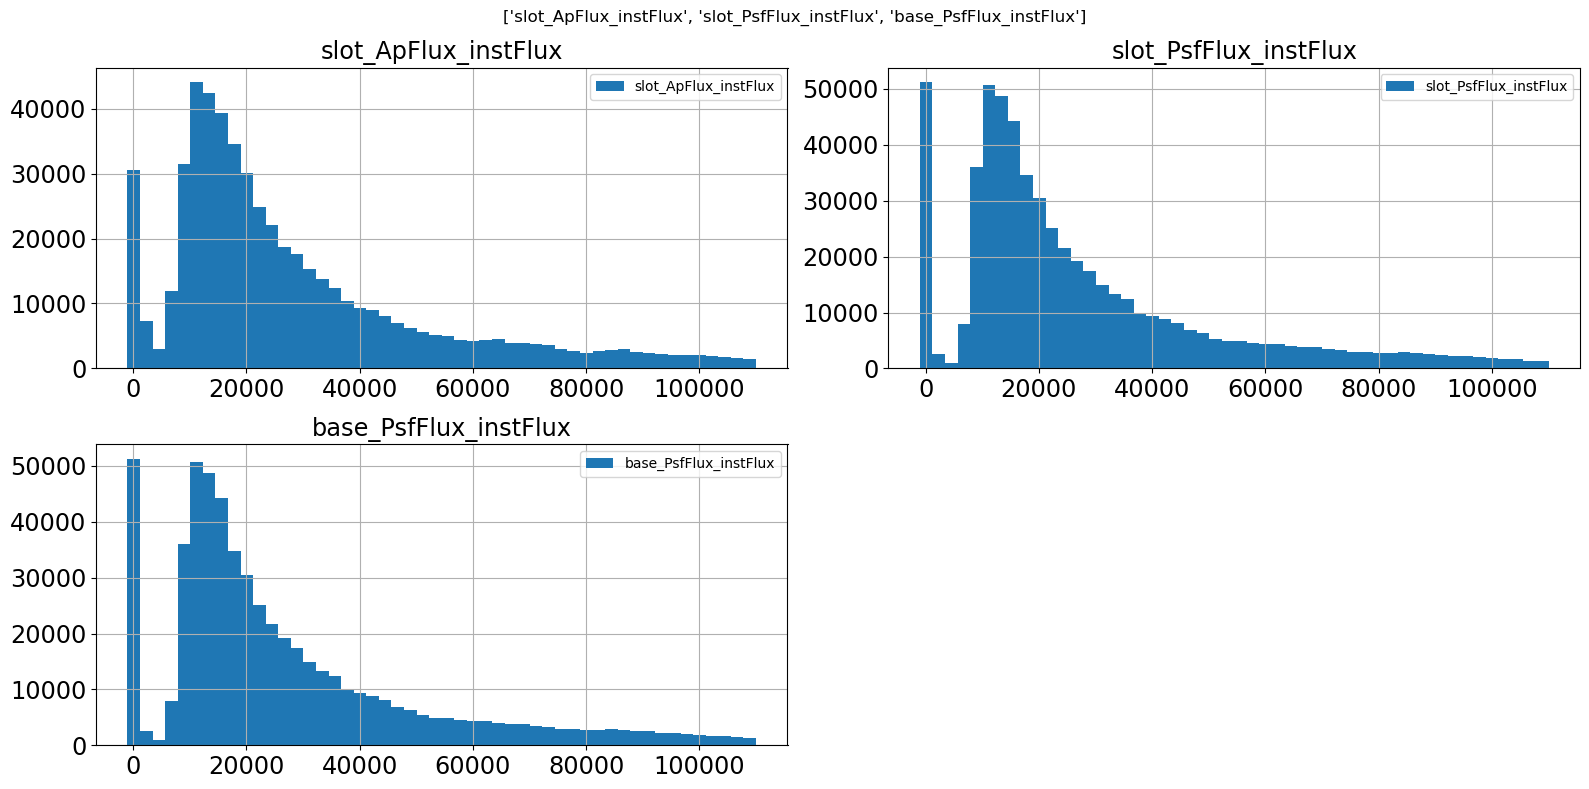

In [12]:
column_names = ["slot_ApFlux_instFlux","slot_PsfFlux_instFlux","base_PsfFlux_instFlux"]
fig,ax = plt.subplots(figsize=(16,8))
#axes = df1.hist(column= column_names,by="nightObs",bins=20,ax=ax,xrot=0,range=(16,23),legend=True)
axes = df1.hist(column= column_names,histtype='bar',bins=50,ax=ax,xrot=0,range=(-1000,110000),legend=True)
plt.suptitle(column_names)
plt.tight_layout()

/tmp/ipykernel_38685/1194354435.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  axes = df1.hist(column= column_names,bins=50,ax=ax,xrot=0,range=(0,30),legend=True)


Text(0.5, 0.98, "['slot_ApFlux_instMag', 'slot_PsfFlux_instMag', 'base_PsfFlux_instMag']")

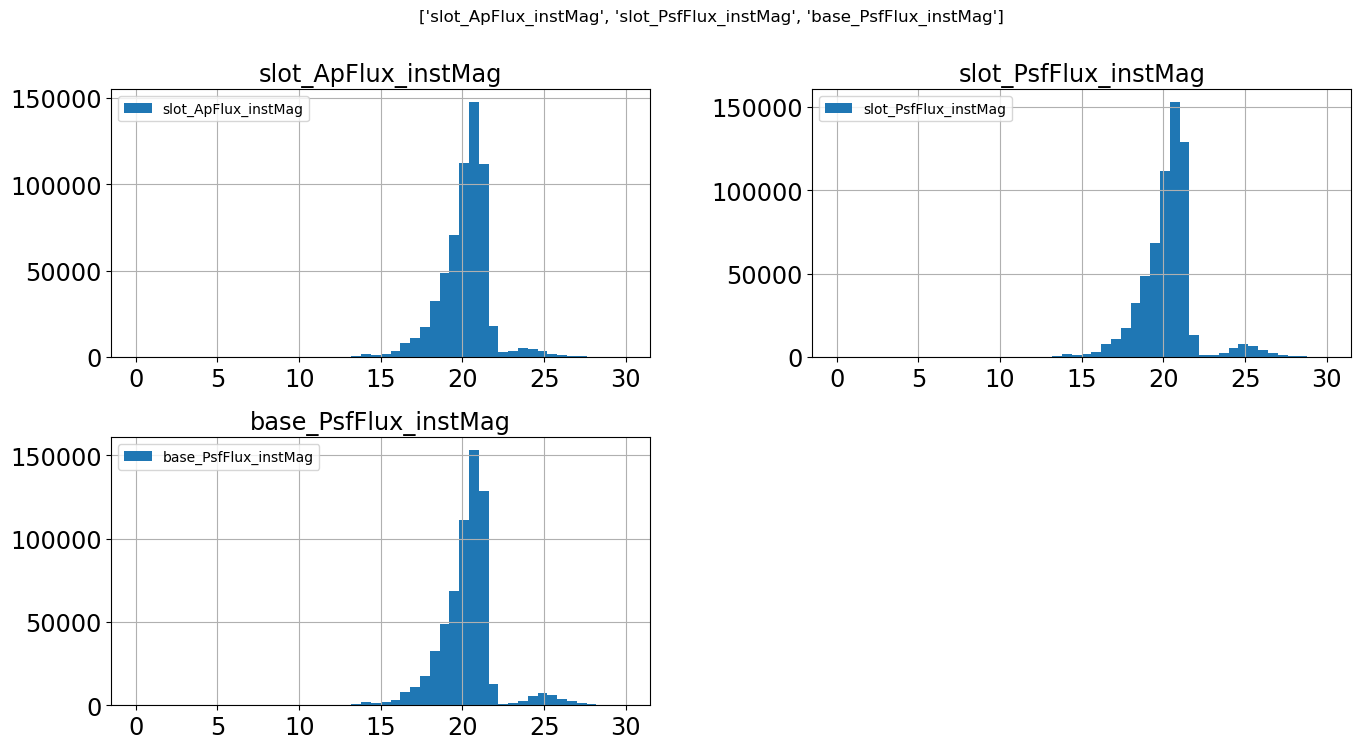

In [13]:
column_names = ["slot_ApFlux_instMag","slot_PsfFlux_instMag","base_PsfFlux_instMag"]
fig,ax = plt.subplots(figsize=(16,8))
#axes = df1.hist(column= column_names,by="nightObs",bins=20,ax=ax,xrot=0,range=(16,23),legend=True)
axes = df1.hist(column= column_names,bins=50,ax=ax,xrot=0,range=(0,30),legend=True)
plt.suptitle(column_names)

In [14]:
#Src
df2.sort_values(by=["visitId","id"], inplace=True) 
df2

,id,coord_ra,coord_dec,parent,calib_detected,calib_psf_candidate,calib_psf_used,calib_psf_reserved,coord_raErr,coord_decErr,...,ext_photometryKron_KronFlux_flag_apCorr,base_ClassificationExtendedness_value,base_ClassificationExtendedness_flag,base_FootprintArea_value,calib_astrometry_used,calib_photometry_used,calib_photometry_reserved,visitId,nightObs,seq
0,171629668770775041,4.190190,-0.420455,0,True,False,False,False,NaN,NaN,...,True,NaN,True,7182,False,False,False,2023051100281,20230511,281
1,171629668770775042,4.190323,-0.420411,0,True,False,False,False,3.045211e-08,2.598655e-08,...,True,0.0,False,7957,False,False,False,2023051100281,20230511,281
2,171629668770775043,4.188508,-0.420719,0,False,False,False,False,4.487996e-07,3.118949e-07,...,True,1.0,False,3132,False,False,False,2023051100281,20230511,281
3,171629668770775044,4.190143,-0.420411,0,True,False,False,False,NaN,NaN,...,True,NaN,True,6505,False,False,False,2023051100281,20230511,281
4,171629668770775045,4.190380,-0.420368,0,False,False,False,False,3.967229e-07,4.355360e-07,...,True,1.0,False,3317,False,False,False,2023051100281,20230511,281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,180918222743143483,2.138607,-0.630357,180918222743143066,True,False,False,False,5.876103e-08,2.725194e-07,...,True,NaN,True,3480,False,False,False,2024013000169,20240130,169
1083,180918222743143484,2.138624,-0.630349,180918222743143066,False,False,False,False,1.003805e-07,3.294321e-07,...,True,0.0,False,2765,False,False,False,2024013000169,20240130,169
1084,180918222743143485,2.138470,-0.630351,180918222743143077,False,False,False,False,7.728156e-09,3.789298e-08,...,True,NaN,True,2531,False,False,False,2024013000169,20240130,169
1085,180918222743143486,2.138468,-0.630367,180918222743143077,False,False,False,False,1.559140e-07,5.246052e-07,...,True,1.0,False,3667,False,False,False,2024013000169,20240130,169


In [15]:
np.sort(df2["nightObs"].unique())

array([20230511, 20230523, 20230524, 20230704, 20230705, 20230706,
       20230718, 20230720, 20230801, 20230802, 20230803, 20230815,
       20230817, 20230829, 20230927, 20230928, 20231010, 20231107,
       20231108, 20231113, 20231114, 20231115, 20231116, 20231120,
       20231121, 20231127, 20231128, 20231129, 20231130, 20231204,
       20231205, 20231206, 20231211, 20231214, 20231215, 20231220,
       20231221, 20231222, 20240129, 20240130])

In [16]:
#CCd visit
df3.sort_values(by=["visitId"], inplace=True) 
df3

,visitId,physical_filter,band,ra,dec,zenithDistance,zeroPoint,psfSigma,skyBg,skyNoise,...,lrcra,lrcdec,nightObs,Time,airmass,tractID,patchID,selectedFlag,dayobsMJD,seq
ccdVisitId,,,,,,,,,,,,,,,,,,,,,
40919696896,2023051100262,SDSSr_65mm~empty,r,239.946728,-24.053747,56.749516,27.690649,7.814408,11.197219,7.856582,...,239.864202,-24.044875,20230511,2023-05-12 01:08:41.302993,1.823818,5615,295,False,60076,262
40919697152,2023051100263,SDSSg_65mm~empty,g,239.941334,-24.038378,56.289413,27.925330,7.783146,3.989901,7.472743,...,240.010470,-24.080526,20230511,2023-05-12 01:10:51.209005,1.801808,5615,295,False,60076,263
40919697408,2023051100264,SDSSi_65mm~empty,i,239.938164,-24.036848,55.439133,27.837013,6.324102,28.071854,8.586543,...,240.007258,-24.079012,20230511,2023-05-12 01:14:49.912000,1.762794,5615,295,False,60076,264
40919698432,2023051100268,SDSSr_65mm~empty,r,239.964414,-24.045512,54.482190,27.765863,8.100543,10.701077,7.854048,...,239.882074,-24.035387,20230511,2023-05-12 01:19:24.311494,1.721301,5615,294,False,60076,268
40919698944,2023051100270,SDSSi_65mm~empty,i,239.961137,-24.046364,53.849274,27.847100,6.745777,23.952093,8.440446,...,240.030234,-24.088534,20230511,2023-05-12 01:22:21.150002,1.695170,5615,294,False,60076,270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43134264832,2024013000166,empty~SDSSy_65mm,y,122.428828,-36.166063,5.993765,26.073267,4.577834,14.221478,8.110322,...,122.360980,-36.113589,20240130,2024-01-31 04:14:20.805994,1.005497,3864,237,False,60340,166
43134265088,2024013000167,SDSSg_65mm~empty,g,122.520273,-36.165952,6.002423,28.069672,4.562790,11.795321,7.969728,...,122.452432,-36.113476,20240130,2024-01-31 04:15:47.589490,1.005513,3864,236,False,60340,167
43134265344,2024013000168,SDSSr_65mm~empty,r,122.520391,-36.165943,6.013887,27.856040,4.841956,9.200282,7.873821,...,122.452549,-36.113472,20240130,2024-01-31 04:16:34.368995,1.005534,3864,236,False,60340,168


In [17]:
np.sort(df3["nightObs"].unique())

array([20230511, 20230523, 20230524, 20230704, 20230705, 20230706,
       20230718, 20230720, 20230801, 20230802, 20230803, 20230815,
       20230816, 20230817, 20230829, 20230914, 20230927, 20230928,
       20231010, 20231011, 20231107, 20231108, 20231113, 20231114,
       20231115, 20231116, 20231120, 20231121, 20231127, 20231128,
       20231129, 20231130, 20231204, 20231205, 20231206, 20231211,
       20231212, 20231214, 20231215, 20231219, 20231220, 20231221,
       20231222, 20240129, 20240130])

In [18]:
# isolated source
df4.sort_values(by=["visitId"], inplace=True) 
df4

,index,sourceId,visitId,detector,ra,dec,physical_filter,band,apFlux_35_0_instFlux,apFlux_35_0_instFluxErr,...,apFlux_50_0_instFlux,apFlux_50_0_instFluxErr,apFlux_50_0_flag,localBackground_instFlux,localBackground_flag,source_row,obj_index,tract,nightObs,seq
5945,113,171629648369680498,2023051100262,0,239.943846,-24.037483,SDSSr_65mm~empty,r,11682.545864,566.986849,...,11784.500412,802.841733,False,0.078950,False,113,39,5615,20230511,262
14739,54,171629648369680439,2023051100262,0,239.951945,-24.082878,SDSSr_65mm~empty,r,14537.218953,646.144172,...,15559.992986,913.481314,False,0.186437,False,54,160,5615,20230511,262
6356,149,171629648369680534,2023051100262,0,239.954058,-24.003433,SDSSr_65mm~empty,r,7552.498704,548.550678,...,7233.976218,778.778434,False,0.036289,False,149,43,5615,20230511,262
12725,109,171629648369680494,2023051100262,0,239.972020,-24.025800,SDSSr_65mm~empty,r,6433.296870,554.620789,...,6772.211148,788.454307,False,-0.050780,False,109,120,5615,20230511,262
18521,49,171629648369680434,2023051100262,0,239.933255,-24.097553,SDSSr_65mm~empty,r,8727.490829,673.469980,...,9406.176961,957.945823,False,0.069934,False,49,287,5615,20230511,262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103915,250,180918223816884475,2024013000170,0,122.495359,-36.129911,empty~SDSSy_65mm,y,265711.720542,772.168701,...,279452.084387,983.669819,False,-0.028821,False,250,367,3864,20240130,170
94392,279,180918223816884504,2024013000170,0,122.513226,-36.118635,empty~SDSSy_65mm,y,12362.190091,605.785863,...,12064.848342,858.821268,False,-0.015053,False,279,306,3864,20240130,170
47010,240,180918223816884465,2024013000170,0,122.550632,-36.134154,empty~SDSSy_65mm,y,14355.896120,580.365493,...,13844.159811,821.046709,False,-0.213675,False,240,98,3864,20240130,170
141015,180,180918223816884405,2024013000170,0,122.466880,-36.153396,empty~SDSSy_65mm,y,24758.107206,609.047006,...,26682.300053,856.993268,False,0.046971,False,180,871,3864,20240130,170


In [19]:
np.sort(df4["nightObs"].unique())

array([20230511, 20230523, 20230524, 20230704, 20230705, 20230706,
       20230718, 20230720, 20230801, 20230802, 20230803, 20230815,
       20230816, 20230817, 20230829, 20230914, 20230927, 20230928,
       20231010, 20231011, 20231107, 20231108, 20231113, 20231114,
       20231115, 20231116, 20231120, 20231121, 20231127, 20231128,
       20231129, 20231130, 20231204, 20231205, 20231206, 20231211,
       20231212, 20231214, 20231215, 20231219, 20231220, 20231221,
       20231222, 20240129, 20240130])

## Select Date

In [20]:
DATEOBS =  20240130

In [21]:
cut1 = df1["nightObs"] == DATEOBS
cut2 = df2["nightObs"] == DATEOBS
cut3 = df3["nightObs"] == DATEOBS
cut4 = df4["nightObs"] == DATEOBS

In [22]:
df1 = df1[cut1]
df2 = df2[cut2]
df3 = df3[cut3]
df4 = df4[cut4]

In [23]:
df4[['visitId','seq','tract']]

,visitId,seq,tract
137243,2024013000089,89,3864
35498,2024013000089,89,3864
69271,2024013000089,89,3864
31574,2024013000089,89,3864
10877,2024013000089,89,3864
...,...,...,...
103915,2024013000170,170,3864
94392,2024013000170,170,3864
47010,2024013000170,170,3864
141015,2024013000170,170,3864


## Merge

In [24]:
df1_m = df1.merge(df3,how='left',left_on="visitId",right_on="visitId")

In [25]:
df1_m

,id,parent,calib_psf_candidate,calib_psf_used,calib_psf_reserved,base_SdssCentroid_x,slot_Centroid_x,base_SdssCentroid_y,slot_Centroid_y,base_SdssCentroid_xErr,...,lrcra,lrcdec,nightObs_y,Time,airmass,tractID,patchID,selectedFlag,dayobsMJD,seq_y
0,180918136843796481,0,False,False,False,606.992692,606.992692,50.572736,50.572736,NaN,...,122.416697,-36.076005,20240130,2024-01-31 02:54:31.459498,1.049477,3864,256,False,60340,89
1,180918136843796482,0,False,False,False,2683.902092,2683.902092,191.491020,191.491020,0.059915,...,122.416697,-36.076005,20240130,2024-01-31 02:54:31.459498,1.049477,3864,256,False,60340,89
2,180918136843796483,0,False,False,False,2882.000000,2882.000000,20.000000,20.000000,0.468839,...,122.416697,-36.076005,20240130,2024-01-31 02:54:31.459498,1.049477,3864,256,False,60340,89
3,180918136843796484,0,False,False,False,2148.000000,2148.000000,176.000000,176.000000,NaN,...,122.416697,-36.076005,20240130,2024-01-31 02:54:31.459498,1.049477,3864,256,False,60340,89
4,180918136843796485,0,False,False,False,429.396990,429.396990,56.105106,56.105106,0.052041,...,122.416697,-36.076005,20240130,2024-01-31 02:54:31.459498,1.049477,3864,256,False,60340,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9390,180918223816884313,0,False,False,False,2915.028508,2915.028508,3796.010222,3796.010222,NaN,...,122.452934,-36.113493,20240130,2024-01-31 04:18:06.970002,1.005600,3864,236,False,60340,170
9391,180918223816884314,0,False,False,False,2218.597456,2218.597456,3734.494485,3734.494485,0.029105,...,122.452934,-36.113493,20240130,2024-01-31 04:18:06.970002,1.005600,3864,236,False,60340,170
9392,180918223816884315,0,False,False,False,1385.000000,1385.000000,3894.000000,3894.000000,0.007207,...,122.452934,-36.113493,20240130,2024-01-31 04:18:06.970002,1.005600,3864,236,False,60340,170
9393,180918223816884316,0,False,False,False,2959.788725,2959.788725,3891.791217,3891.791217,NaN,...,122.452934,-36.113493,20240130,2024-01-31 04:18:06.970002,1.005600,3864,236,False,60340,170


In [26]:
df2_m = df2.merge(df3,how='left',left_on="visitId",right_on="visitId")

In [27]:
df2_m 

,id,coord_ra,coord_dec,parent,calib_detected,calib_psf_candidate,calib_psf_used,calib_psf_reserved,coord_raErr,coord_decErr,...,lrcra,lrcdec,nightObs_y,Time,airmass,tractID,patchID,selectedFlag,dayobsMJD,seq_y
0,180918142212505601,2.137332,-0.631479,0,False,False,False,False,2.766323e-07,3.156522e-07,...,122.43430,-36.075534,20240130,2024-01-31 03:12:21.715995,1.031640,3864,255,False,60340,94
1,180918142212505602,2.138258,-0.631470,0,False,False,False,False,3.305589e-07,1.360117e-07,...,122.43430,-36.075534,20240130,2024-01-31 03:12:21.715995,1.031640,3864,255,False,60340,94
2,180918142212505603,2.138957,-0.631461,0,False,False,False,False,6.063371e-07,2.435253e-07,...,122.43430,-36.075534,20240130,2024-01-31 03:12:21.715995,1.031640,3864,255,False,60340,94
3,180918142212505604,2.139086,-0.631159,0,True,False,False,False,1.477716e-09,7.950274e-08,...,122.43430,-36.075534,20240130,2024-01-31 03:12:21.715995,1.031640,3864,255,False,60340,94
4,180918142212505605,2.137545,-0.631462,0,False,False,False,False,1.092336e-07,9.085122e-08,...,122.43430,-36.075534,20240130,2024-01-31 03:12:21.715995,1.031640,3864,255,False,60340,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4145,180918222743143483,2.138607,-0.630357,180918222743143066,True,False,False,False,5.876103e-08,2.725194e-07,...,122.45253,-36.113490,20240130,2024-01-31 04:17:18.466999,1.005561,3864,236,False,60340,169
4146,180918222743143484,2.138624,-0.630349,180918222743143066,False,False,False,False,1.003805e-07,3.294321e-07,...,122.45253,-36.113490,20240130,2024-01-31 04:17:18.466999,1.005561,3864,236,False,60340,169
4147,180918222743143485,2.138470,-0.630351,180918222743143077,False,False,False,False,7.728156e-09,3.789298e-08,...,122.45253,-36.113490,20240130,2024-01-31 04:17:18.466999,1.005561,3864,236,False,60340,169
4148,180918222743143486,2.138468,-0.630367,180918222743143077,False,False,False,False,1.559140e-07,5.246052e-07,...,122.45253,-36.113490,20240130,2024-01-31 04:17:18.466999,1.005561,3864,236,False,60340,169


In [28]:
df_sel.plot.scatter('x','y',c='ccdVisitId',colormap='viridis')

NameError: name 'df_sel' is not defined

In [ ]:
df_sel.plot.scatter('ra','dec',c='ccdVisitId',colormap='hsv',grid=True,figsize=(10,5))

In [ ]:
df_sel.plot.scatter('coord_ra','coord_dec',c='ccdVisitId',colormap='hsv',grid=True,figsize=(10,5))

In [ ]:
df_sel['coord_ra'].plot(kind="hist",bins=50 ,range=(0,360),logy=True,title="coord_ra",grid=True,figsize=(10,5))

In [ ]:
df_sel['coord_dec'].plot(kind="hist",bins=50 ,range=(-90,10),logy=True,title="coord_dec",grid=True,figsize=(10,5))

In [ ]:
cut_skyloc = ((df_sel['dec'] < -30) & (df_sel['dec'] > -40) & (df_sel['ra'] > 100) & (df_sel['ra'] < 150))

In [ ]:
df_sel = df_sel[cut_skyloc]

In [ ]:
df_sel['psfMag'].plot(kind="hist",bins=50,range=(5,30),logy=True,grid=True,title="psMag")

In [ ]:
df_sel['gaussianMag'].plot(kind="hist",bins=50 ,range=(5,30),logy=True,grid=True,title="gaussianMag")

In [ ]:
df_sel

In [ ]:
#df_sel.groupby(df_sel['dateobs'].dt.date).size().plot()
datetime = pd.to_datetime(df_sel['dateobs'])

In [ ]:
df_sel['dateobs'].max()

In [ ]:
df_sel["date"] = df["dateobs"].astype("datetime64")

In [ ]:
df_sel

In [ ]:
df_time = df_sel[["date"]]

In [ ]:
df_time

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax = (df_time["date"].groupby(df_time["date"].dt.minute)
                         .count()).plot(kind="bar")